In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
import warnings
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import preprocessing
import math
import os

In [2]:
#Compute the Zero Cross
def ZeroCrossingRate(alist):
    count=0
    f_value = alist[0]
    for b_index in range(1,len(alist)):
        b_value=alist[b_index]
        if (f_value*b_value < 0):
            count += 1
        f_value = b_value
    
    return count/(len(alist)-1)    

In [10]:
filelist = os.listdir('F:/ingv/train/')
len(filelist)

In [7]:
#All features
featureName_list=['seg_id',
                'sensor_1_avg','sensor_1_sd','sensor_1_max','sensor_1_min','sensor_1_q25','sensor_1_q50',
                'sensor_1_q75','sensor_1_zc','sensor_1_85ro','sensor_1_ku','sensor_1_sk',
                'sensor_2_avg','sensor_2_sd','sensor_2_max','sensor_2_min','sensor_2_q25','sensor_2_q50',
                'sensor_2_q75','sensor_2_zc','sensor_2_85ro','sensor_2_ku','sensor_2_sk',
                'sensor_3_avg','sensor_3_sd','sensor_3_max','sensor_3_min','sensor_3_q25','sensor_3_q50',
                'sensor_3_q75','sensor_3_zc','sensor_3_85ro','sensor_3_ku','sensor_3_sk',
                'sensor_4_avg','sensor_4_sd','sensor_4_max','sensor_4_min','sensor_4_q25','sensor_4_q50',
                'sensor_4_q75','sensor_4_zc','sensor_4_85ro','sensor_4_ku','sensor_4_sk',
                'sensor_5_avg','sensor_5_sd','sensor_5_max','sensor_5_min','sensor_5_q25','sensor_5_q50',
                'sensor_5_q75','sensor_5_zc','sensor_5_85ro','sensor_5_ku','sensor_5_sk',
                'sensor_6_avg','sensor_6_sd','sensor_6_max','sensor_6_min','sensor_6_q25','sensor_6_q50',
                'sensor_6_q75','sensor_6_zc','sensor_6_85ro','sensor_6_ku','sensor_6_sk',
                'sensor_7_avg','sensor_7_sd','sensor_7_max','sensor_7_min','sensor_7_q25','sensor_7_q50',
                'sensor_7_q75','sensor_7_zc','sensor_7_85ro','sensor_7_ku','sensor_7_sk',
                'sensor_8_avg','sensor_8_sd','sensor_8_max','sensor_8_min','sensor_8_q25','sensor_8_q50',
                'sensor_8_q75','sensor_8_zc','sensor_8_85ro','sensor_8_ku','sensor_8_sk',
                'sensor_9_avg','sensor_9_sd','sensor_9_max','sensor_9_min','sensor_9_q25','sensor_9_q50',
                'sensor_9_q75','sensor_9_zc','sensor_9_85ro','sensor_9_ku','sensor_9_sk',
                'sensor_10_avg','sensor_10_sd','sensor_10_max','sensor_10_min','sensor_10_q25','sensor_10_q50',
                'sensor_10_q75','sensor_10_zc','sensor_10_85ro','sensor_10_ku','sensor_10_sk']

In [8]:
#features extraction
result_df=pd.DataFrame(columns=featureName_list)
i = 0

path = 'F:/ingv/ingv_mid_dataset.csv'
if os.path.exists(path):
    os.remove(path)  

midf=open(path,'a')
featurerow=''
for feature in result_df.columns:
    featurerow=featurerow+feature+','

featurerow=featurerow[:-1]+'\n'
midf.write(featurerow)

for filename in filelist:
    one_row_df=pd.DataFrame(columns=featureName_list,index=[i])
    one_row_df.iloc[0]=0
    train_df = pd.read_csv('F:/ingv/train/'+filename)
    one_row_df.loc[i,'seg_id']=filename.split('.')[0]
    
    for sensorindex in range(1,11):
        
        avg=train_df['sensor_'+str(sensorindex)].mean()
        if not math.isnan(avg):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_avg']=avg
            
        sd=train_df['sensor_'+str(sensorindex)].std()
        if not math.isnan(sd):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_sd']=sd
            
        smax=train_df['sensor_'+str(sensorindex)].max()
        if not math.isnan(smax):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_max']=smax
            
        smin=train_df['sensor_'+str(sensorindex)].min()
        if not math.isnan(smin):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_min']=smin
            
        q25=train_df['sensor_'+str(sensorindex)].quantile(0.25)
        if not math.isnan(q25):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_q25']=q25
            
        q50=train_df['sensor_'+str(sensorindex)].quantile(0.5)
        if not math.isnan(q50):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_q50']=q50
            
        q75=train_df['sensor_'+str(sensorindex)].quantile(0.75)
        if not math.isnan(q75):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_q75']=q75
            
        zc=ZeroCrossingRate(train_df['sensor_'+str(sensorindex)])
        if not math.isnan(zc):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_zc']=zc  
            
#         ro=train_df['sensor_'+str(sensorindex)].mean()
#         if not math.isnan(avg):
#             one_row_df.loc[i,'sensor_'+str(sensorindex)+'_avg']=avg
            
        ku=train_df['sensor_'+str(sensorindex)].kurt()
        if not math.isnan(ku):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_ku']=ku
            
        sk=train_df['sensor_'+str(sensorindex)].skew()
        if not math.isnan(sk):
            one_row_df.loc[i,'sensor_'+str(sensorindex)+'_sk']=sk
                
    
    datarow=''
    for data in one_row_df.iloc[0]:
        datarow=datarow+str(data)+','

    datarow=datarow[:-1]+'\n'
    midf.write(datarow)
    
    result_df=result_df.append(one_row_df)
    
    i += 1
    if(i%100 == 0):
        print(i)

midf.close()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [33]:
label_df=pd.read_csv('F:/ingv/train.csv')

for segmentid in result_df['seg_id']:
    result_id = result_df[result_df['seg_id'] == segmentid].index
    label_id =  label_df[label_df['segment_id'] == int(segmentid)].index
    result_df.loc[result_id,'label'] = float(label_df.loc[label_id,'time_to_eruption'])

In [8]:
df = result_df

del df['sensor_1_85ro'] 
del df['sensor_2_85ro'] 
del df['sensor_3_85ro'] 
del df['sensor_4_85ro'] 
del df['sensor_5_85ro'] 
del df['sensor_6_85ro'] 
del df['sensor_7_85ro'] 
del df['sensor_8_85ro'] 
del df['sensor_9_85ro'] 
del df['sensor_10_85ro']

In [5]:
df

,seg_id,sensor_1_avg,sensor_1_sd,sensor_1_max,sensor_1_min,sensor_1_q25,sensor_1_q50,sensor_1_q75,sensor_1_zc,sensor_1_ku,...,sensor_10_sd,sensor_10_max,sensor_10_min,sensor_10_q25,sensor_10_q50,sensor_10_q75,sensor_10_zc,sensor_10_ku,sensor_10_sk,label
0,1000015382,0.382244,111.553322,822,-920,-66,0,67,0.099150,2.873691,...,249.024286,3179,-2961,-117,0,119.0,0.057417,14.978789,0.058227,16258654.0
1,1000554676,-3.828120,532.160723,2293,-2039,-356,0,348,0.043500,0.154876,...,1054.655004,4442,-4329,-710,0,691.0,0.048900,0.160791,0.004739,6347792.0
2,1000745424,8.291928,608.823318,2524,-2193,-400,0,414,0.040233,0.034508,...,1228.949335,5230,-5040,-801,0,813.0,0.048017,0.193508,-0.025480,5120693.0
3,1001461087,2.071582,414.293195,4085,-3112,-246,0,252,0.218450,3.927669,...,736.213172,5788,-4634,-425,0,432.0,0.047367,2.732420,-0.051503,10393161.0
4,1001732002,0.904102,289.861921,1692,-1723,-187,0,184,0.044000,0.824943,...,907.733048,4574,-3909,-544,0,545.0,0.046100,1.135692,0.375558,20549733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,998393594,-2.065582,223.901241,1865,-1533,-131,0,128,0.049317,2.828362,...,489.545427,2911,-4912,-288,0,301.0,0.057400,2.799295,-0.145148,23064624.0
4427,998625201,0.822920,441.541874,3727,-4582,-279,0,275,0.160517,1.902459,...,709.742718,2863,-3011,-472,0,479.0,0.042500,0.141066,-0.007711,46296746.0
4428,998818197,2.583740,441.391224,2373,-2606,-282,0,292,0.027767,0.696296,...,820.402688,4211,-5667,-526,0,529.0,0.042167,0.944920,-0.015991,24733042.0
4429,998818893,-1.414143,394.273260,1591,-1664,-264,0,258,0.027267,0.368570,...,723.535770,3733,-4456,-463,0,458.0,0.044233,0.898496,-0.017216,40656101.0


In [4]:
#split the data set
data=df.iloc[:,1:-1]
label=df.iloc[:,-1]

train_X,test_X,train_y,test_y = train_test_split(data,label,test_size=0.3,random_state=5)

In [5]:
# linear regression
model1 = linear_model.LinearRegression()
model1.fit(train_X, train_y)

predict1 = model1.predict(test_X)

In [6]:
predict1

array([19085910.2692093 , 30200203.81701856,  9809338.18894505, ...,
       36526553.35419327, 23240781.96975587, 23142951.52188974])

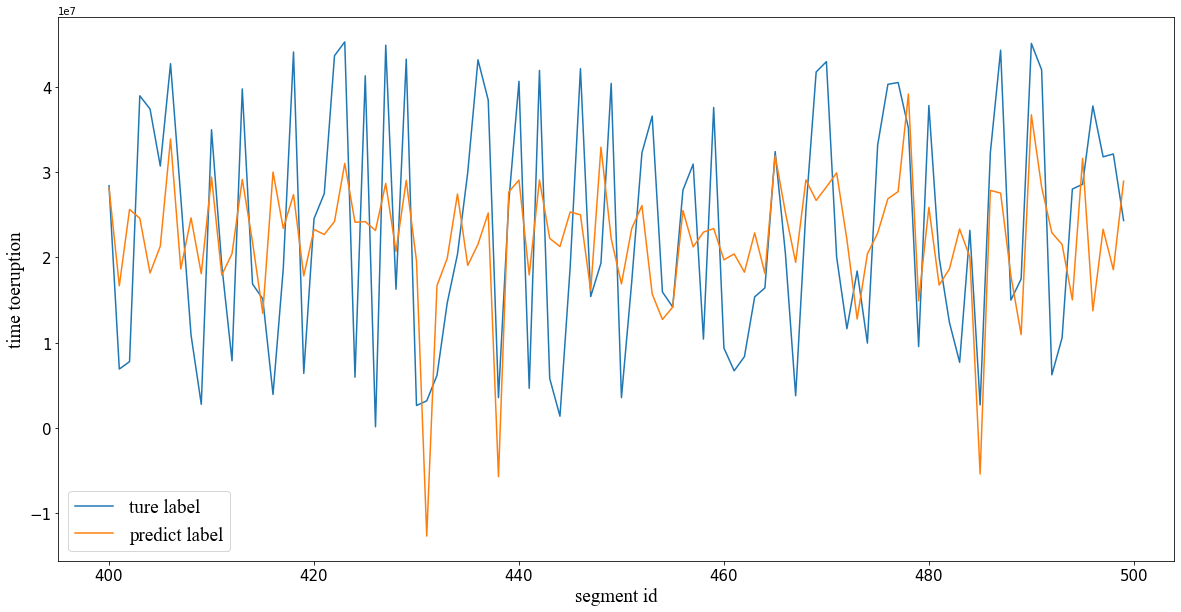

In [7]:
plt.figure(figsize=(20,10))
plt.plot(range(400,500),test_y[400:500], label='ture label')
plt.plot(range(400,500),predict1[400:500], label='predict label')
font1 = {'family' : 'Times New Roman',
         'weight' : 'normal',
         'size'   : 19}
plt.legend(prop=font1)
plt.tick_params(labelsize=15)
plt.xlabel('segment id',font1)
plt.ylabel('time toeruption',font1)
plt.savefig('F:/ingv/f1.jpg',dpi = 100)

In [8]:
mean_absolute_error(test_y,predict1)

10228705.757871263

In [9]:
df.drop([random.randint(0,len(df)-1)],axis=0,inplace=True)

In [35]:
# linear regression with cross validation
mae_list=[]
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(df):
    train_X = df.iloc[train_index, 1:-1]
    test_X = df.iloc[test_index, 1:-1]
    train_y = df.iloc[train_index, -1]
    test_y = df.iloc[test_index, -1]
    
    model2 = linear_model.LinearRegression()
    model2.fit(train_X, train_y)
    predict2 = model2.predict(test_X)
    mae_list.append(mean_absolute_error(test_y,predict2))

In [36]:
np.mean(mae_list)

10112454.989007698

In [96]:
# Ridge regression
mean_mae_list = []
for a_para in range(1,11):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(df):
        train_X = df.iloc[train_index, 1:-1]
        test_X = df.iloc[test_index, 1:-1]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model3 = linear_model.Ridge(alpha=a_para)
        model3.fit(train_X, train_y)
        predict3 = model3.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict3))

    mean_mae_list.append(np.mean(mae_list))

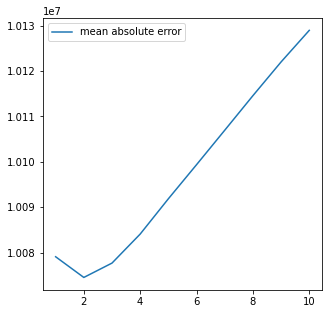

In [97]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),mean_mae_list, label='mean absolute error')
plt.legend()
plt.savefig('F:/ingv/f2.jpg',dpi = 100)

In [16]:
mean_mae_list = []
for a_para in np.arange(1,3,0.1):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(df):
        train_X = df.iloc[train_index, 1:-1]
        test_X = df.iloc[test_index, 1:-1]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model4 = linear_model.Ridge(alpha=a_para)
        model4.fit(train_X, train_y)
        predict4 = model4.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict4))

    mean_mae_list.append((a_para,np.mean(mae_list)))

In [20]:
first_alpha = sorted(mean_mae_list, key = lambda x:x[1])[0]
print('The optimal alpha:',first_alpha[0],'MAE:',first_alpha[1])

The optimal alpha: 1.9000000000000008 MAE: 10073288.066281283


In [92]:
# lasso regression
warnings.filterwarnings('ignore')
mean_mae_list = []
for a_para in range(1,12001,100):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(df):
        train_X = df.iloc[train_index, 1:-1]
        test_X = df.iloc[test_index, 1:-1]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model5 = linear_model.Lasso(alpha=a_para)
        model5.fit(train_X, train_y)
        predict5 = model5.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict5))

    mean_mae_list.append(np.mean(mae_list))
    
warnings.filterwarnings('default')

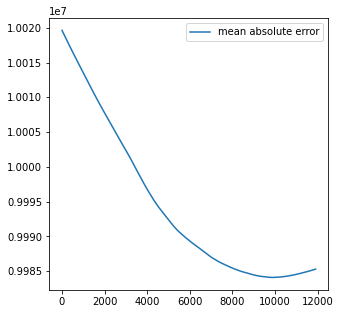

In [95]:
plt.figure(figsize=(5,5))
plt.plot(range(1,12001,100), mean_mae_list, label='mean absolute error')
plt.legend()
plt.savefig('F:/ingv/f3.jpg',dpi = 100)

In [83]:
warnings.filterwarnings('ignore')
mean_mae_list = []
for a_para in range(9850,9871,1):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(df):
        train_X = df.iloc[train_index, 1:-1]
        test_X = df.iloc[test_index, 1:-1]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model6 = linear_model.Lasso(alpha=a_para)
        model6.fit(train_X, train_y)
        predict6 = model6.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict6))

    mean_mae_list.append((a_para,np.mean(mae_list)))
    
warnings.filterwarnings('default')

In [84]:
first_alpha = sorted(mean_mae_list, key = lambda x:x[1])[0]
print('The optimal alpha:',first_alpha[0],'MAE:',first_alpha[1])

The optimal alpha: 9868 MAE: 9984086.474992331


In [4]:
data=df.iloc[:,1:-1]
label=df.iloc[:,-1]

train_X,test_X,train_y,test_y = train_test_split(data,label,test_size=0.3, random_state=714)
train_X = np.array(train_X)
test_X = np.array(test_X)

In [5]:
# XGBoost
model7=xgb.XGBRegressor()
model7.fit(train_X, train_y)
predict7 = model7.predict(test_X)

In [8]:
mean_absolute_error(test_y,predict7)

4120630.786642387

In [9]:
mae_list=[]
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(df):
    train_X = np.array(df.iloc[train_index, 1:-1])
    test_X = np.array(df.iloc[test_index, 1:-1])
    train_y = df.iloc[train_index, -1]
    test_y = df.iloc[test_index, -1]
    
    model8 = xgb.XGBRegressor()
    model8.fit(train_X, train_y)
    predict8 = model8.predict(test_X)
    mae_list.append(mean_absolute_error(test_y,predict8))

In [10]:
np.mean(mae_list)

3744773.753283862

In [10]:
#PCA and scale

# pca = PCA(n_components='mle')
# dr_data = pca.fit_transform(np.array(df.iloc[:,1:-1]))

min_max_scaler = preprocessing.MinMaxScaler()
dr_data = min_max_scaler.fit_transform(np.array(df.iloc[:,1:-1]))

In [11]:
dr_data.shape

(4430, 100)

In [12]:
# linear regression
mae_list=[]
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(dr_data):
    train_X = dr_data[train_index, :]
    test_X = dr_data[test_index, :]
    train_y = df.iloc[train_index, -1]
    test_y = df.iloc[test_index, -1]
    
    model9 = linear_model.LinearRegression()
    model9.fit(train_X, train_y)
    predict9 = model9.predict(test_X)
    mae_list.append(mean_absolute_error(test_y,predict9))

In [13]:
np.mean(mae_list)

10110713.2915267

In [14]:
# Ridge regression
mean_mae_list = []
for a_para in np.arange(1,10,0.1):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(dr_data):
        train_X = dr_data[train_index, :]
        test_X = dr_data[test_index, :]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model10 = linear_model.Ridge(alpha=a_para)
        model10.fit(train_X, train_y)
        predict10 = model10.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict10))

    mean_mae_list.append((a_para,np.mean(mae_list)))

In [15]:
first_alpha = sorted(mean_mae_list, key = lambda x:x[1])[0]
print('The optimal alpha:',first_alpha[0],'MAE:',first_alpha[1])

The optimal alpha: 2.7000000000000015 MAE: 9828569.177084874


In [20]:
# Lasso regression
warnings.filterwarnings('ignore')
mean_mae_list = []
for a_para in range(5150,5170,1):
    mae_list=[]
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(df):
        train_X = dr_data[train_index, :]
        test_X = dr_data[test_index, :]
        train_y = df.iloc[train_index, -1]
        test_y = df.iloc[test_index, -1]

        model11 = linear_model.Lasso(alpha=a_para)
        model11.fit(train_X, train_y)
        predict11 = model11.predict(test_X)
        mae_list.append(mean_absolute_error(test_y,predict11))

    mean_mae_list.append((a_para,np.mean(mae_list)))
    
warnings.filterwarnings('default')

In [21]:
first_alpha = sorted(mean_mae_list, key = lambda x:x[1])[0]
print('The optimal alpha:',first_alpha[0],'MAE:',first_alpha[1])

The optimal alpha: 5163 MAE: 9812649.159830272


In [22]:
# XGBoost
mae_list=[]
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(df):
    train_X = dr_data[train_index, :]
    test_X = dr_data[test_index, :]
    train_y = df.iloc[train_index, -1]
    test_y = df.iloc[test_index, -1]
    
    model12 = xgb.XGBRegressor()
    model12.fit(train_X, train_y)
    predict12 = model12.predict(test_X)
    mae_list.append(mean_absolute_error(test_y,predict12))

In [23]:
np.mean(mae_list)

3843430.616302201